In [1]:
import pandas as pd

# Let's get the dataset in https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
# You can see dataset details on https://archive.ics.uci.edu/ml/datasets/Iris
# datafile='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
# I have it in my local computer, so I don't need to go to archive.ics.uci.edu server

datafile='iris-data.csv'
df = pd.read_csv('iris-data.csv', 
                 header = None, names=['Sepal lenght', 'Sepal width', 'Petal length', 'Petal width', 'Class'])

# Print the first 5 rows in dataset
print('\x1b[1;331m'+'First 3 rows in dataset'+'\x1b[0m')
print(df.head(3))
print('\n')

# Print all class names
print('\x1b[1;331m'+'All distinct classes in dataset'+'\x1b[0m')
print(pd.unique(df.iloc[:, 4]))
print('\n')

def normalize(row):
    if row['Class'] == 'Iris-setosa':
        return 0
    if row['Class'] == 'Iris-versicolor':
        return 1
    if row['Class'] == 'Iris-virginica':
        return 2
    return -1

df['Normalized class'] = df.apply(lambda row: normalize(row), axis=1 )

# Print all normalized class names
print('\x1b[1;331m'+'All distinct normalized classes in dataset'+'\x1b[0m')
print(pd.unique(df.iloc[:, 5]))
print('\n')


First 3 rows in dataset
   Sepal lenght  Sepal width  Petal length  Petal width        Class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa


All distinct classes in dataset
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


All distinct normalized classes in dataset
[0 1 2]




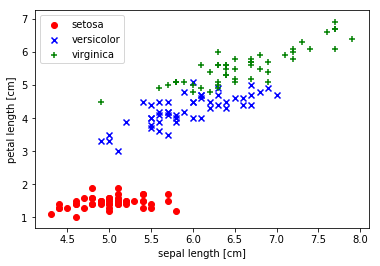

In [3]:
import matplotlib.pyplot as plt

# Let's draw so we can have an idea of what is happening here
setosa = df[df['Normalized class'] == 0]
versicolor = df[df['Normalized class'] == 1]
virginica = df[df['Normalized class'] == 2]

plt.scatter(setosa['Sepal lenght'], setosa['Petal length'], color = 'red', marker = 'o', label = 'setosa')
plt.scatter(versicolor['Sepal lenght'], versicolor['Petal length'], color = 'blue', marker = 'x', label = 'versicolor')
plt.scatter(virginica['Sepal lenght'], virginica['Petal length'], color = 'green', marker = '+', label = 'virginica')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.show()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron

data = df[['Sepal lenght', 'Petal length']]
target = df['Normalized class']

# Create the differents sets: one for training and one for test
(data_train, data_test, 
 target_train, target_test) = train_test_split(data, 
                                                target, 
                                                test_size=0.3, 
                                                random_state=1)
ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1)
ppn.fit(data_train, target_train)


Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=40, n_iter=None, n_jobs=1, penalty=None, random_state=1,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [5]:
from sklearn.metrics import accuracy_score

predictions = ppn.predict(data_test)
print('Accuracy: %.2f' % accuracy_score(target_test, predictions))

Accuracy: 0.80


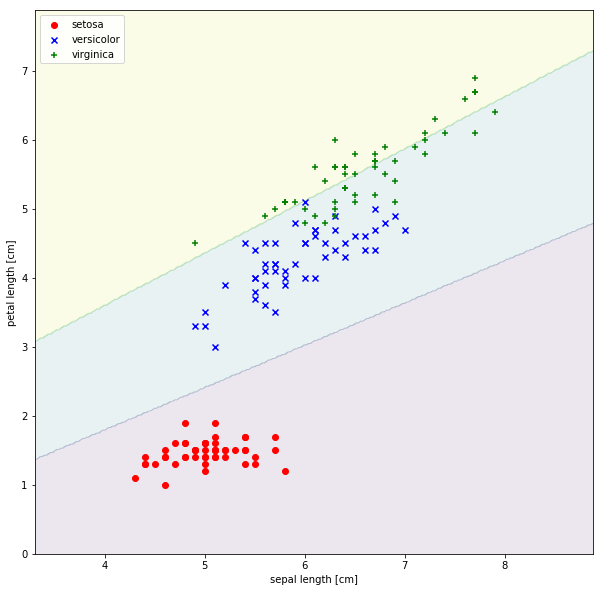

In [7]:
import numpy as np

x_min, x_max = df['Sepal lenght'].min() - 1, df['Sepal lenght'].max() + 1
y_min, y_max = df['Petal length'].min() - 1, df['Petal length'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

plt.figure(figsize=(10, 10))
Z = ppn.predict(np.array([xx.ravel(), yy.ravel()]).T)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha = 0.1)

# Let's draw so we can have an idea of what is happening here
setosa = df[df['Normalized class'] == 0]
versicolor = df[df['Normalized class'] == 1]
virginica = df[df['Normalized class'] == 2]

plt.scatter(setosa['Sepal lenght'], setosa['Petal length'], color = 'red', marker = 'o', label = 'setosa')
plt.scatter(versicolor['Sepal lenght'], versicolor['Petal length'], color = 'blue', marker = 'x', label = 'versicolor')
plt.scatter(virginica['Sepal lenght'], virginica['Petal length'], color = 'green', marker = '+', label = 'virginica')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.show()
